# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "../output_data/cities.csv"
# csv_file=pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# csv_file.head()


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_lst=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_lst.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)
# pprint(lat_lng_lst)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create a DataFrame 
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0:"Cities"})
cities_df.head()

,Cities
0,ancud
1,port macquarie
2,vaini
3,lebu
4,bolungarvik


In [4]:
cities_df["lat_lng_lst"]=lat_lng_lst
cities_df["Latitude"]=cities_df["lat_lng_lst"].map(lambda x: str(x[0]))
cities_df["Longtitude"]=cities_df["lat_lng_lst"].map(lambda x: str(x[1]))
del cities_df['lat_lng_lst']
cities_df

,Cities,Latitude,Longtitude
0,ancud,-41.76581708928762,-77.00058705874886
1,port macquarie,-33.4351783801366,155.1058515853291
2,vaini,-73.0484449398931,-179.9566150617423
3,lebu,-34.96866476409074,-97.05882129474377
4,bolungarvik,68.98163122207356,-28.160783743662677
...,...,...,...
640,xai-xai,-28.163104459357854,36.15112503915881
641,suao,23.986319436771936,122.8247568349176
642,bol,7.567010001177181,15.816504571227654
643,lasa,34.219205830309676,88.28347141524739


In [5]:
#Create new columns for data we'll be collecting from the API
max_temp=[]
humidity=[]
cloud=[]
wind_speed=[]
country=[]
date=[]

url = "http://api.openweathermap.org/data/2.5/weather?"
city=cities_df["Cities"]

units="imperial"
#Build Partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + weather_api_key
print("Beginning Data Retrieval")
print("-------------------------")
counter=1
for city in cities:

    response=requests.get(query_url+city).json()
    try:
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
       
        print(f"Processing Record {counter} | {response['name']}")
        print(query_url+city)
        counter=counter+1
#         print("The data is found!")
    except:
        max_temp.append(None)
        humidity.append(None)
        cloud.append(None)
        wind_speed.append(None)
        country.append(None)
        date.append(None)
        print("The data couldn't be found!")
    next

Beginning Data Retrieval
-------------------------
Processing Record 1 | Ancud
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=ancud
Processing Record 2 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=port macquarie
Processing Record 3 | Vaini
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=vaini
Processing Record 4 | Lebu
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=lebu
The data couldn't be found!
Processing Record 5 | Provideniya
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=provideniya
Processing Record 6 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=bredasdorp
Processing Record 7 | Yumen
http://api.openweathermap.org/dat

Processing Record 58 | Praia
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=praia
Processing Record 59 | Vanavara
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=vanavara
Processing Record 60 | Chapleau
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=chapleau
Processing Record 61 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=nikolskoye
Processing Record 62 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=bambous virieux
Processing Record 63 | Kirakira
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kirakira
Processing Record 64 | Barrow
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=im

Processing Record 115 | Sabang
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=sabang
Processing Record 116 | Khāsh
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=khash
Processing Record 117 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=srednekolymsk
Processing Record 118 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=nouadhibou
Processing Record 119 | Loandjili
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=loandjili
Processing Record 120 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=mar del plata
Processing Record 121 | Huilong
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559

Processing Record 173 | Narsaq
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=narsaq
Processing Record 174 | Hilo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=hilo
Processing Record 175 | Boguchany
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=boguchany
Processing Record 176 | Ruska Poliana
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=russkaya polyana
Processing Record 177 | Coahuayana Viejo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=coahuayana
Processing Record 178 | Namie
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=namie
Processing Record 179 | São Filipe
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&un

Processing Record 229 | Severo-Kuril'sk
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=severo-kurilsk
The data couldn't be found!
Processing Record 230 | Kavieng
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kavieng
Processing Record 231 | Kailāras
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kailaras
Processing Record 232 | Kidal
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kidal
Processing Record 233 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=iqaluit
Processing Record 234 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kaitangata
Processing Record 235 | Újkígyós
http://api.openweathermap.org/data/2.5/weather?appid=d31988c47

Processing Record 284 | Jāwā
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=jawa
Processing Record 285 | Fairview Park
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=fairview park
Processing Record 286 | Kalashnikovo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kalashnikovo
The data couldn't be found!
Processing Record 287 | Gijang
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kijang
Processing Record 288 | Estación Coahuila
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=estacion coahuila
Processing Record 289 | Yantal'
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=yantal
Processing Record 290 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?

Processing Record 340 | Inhambane
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=inhambane
Processing Record 341 | Binzhou
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=binzhou
Processing Record 342 | Värnamo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=varnamo
Processing Record 343 | Valladolid
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=valladolid
Processing Record 344 | Rafai
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=rafai
The data couldn't be found!
Processing Record 345 | Talnakh
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=talnakh
Processing Record 346 | Bull Savanna
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cb

Processing Record 396 | Bainbridge Island
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=bainbridge
Processing Record 397 | Trofors
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=trofors
Processing Record 398 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=port-gentil
Processing Record 399 | Merauke
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=merauke
Processing Record 400 | Nuuk
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=nuuk
Processing Record 401 | Gorom-Gorom
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=gorom-gorom
Processing Record 402 | Huarmey
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&u

Processing Record 452 | Moirāng
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=moirang
Processing Record 453 | Strezhevoy
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=strezhevoy
Processing Record 454 | Sanghar
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=sanghar
Processing Record 455 | Waddān
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=waddan
Processing Record 456 | Castellammare del Golfo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=castellammare del golfo
Processing Record 457 | Safi
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=asfi
Processing Record 458 | Osypenko
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be

Processing Record 508 | Kalemie
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kalemie
Processing Record 509 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=port hedland
Processing Record 510 | Vao
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=vao
Processing Record 511 | Jieshou
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=jieshou
Processing Record 512 | Lüderitz
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=luderitz
Processing Record 513 | Labuan
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=labuan
Processing Record 514 | Solnechnyy
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=so

Processing Record 564 | Nara
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=nara
Processing Record 565 | Belle Fourche
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=belle fourche
Processing Record 566 | Asilah
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=asilah
Processing Record 567 | Ranau
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=ranau
Processing Record 568 | Xinqing
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=xinqing
Processing Record 569 | Midyat
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=midyat
Processing Record 570 | Ebeltoft
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=ebeltoft

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df['Max_Temp']=max_temp
cities_df['Humidity']=humidity
cities_df['Cloudiness']=cloud
cities_df['WindSpeed']=wind_speed
cities_df['Country']=country
cities_df['Date']=date

cities_df


,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ancud,-41.76581708928762,-77.00058705874886,54.00,76.0,81.0,6.93,CL,1.595277e+09
1,port macquarie,-33.4351783801366,155.1058515853291,39.00,87.0,14.0,11.30,AU,1.595277e+09
2,vaini,-73.0484449398931,-179.9566150617423,71.60,78.0,20.0,6.93,TO,1.595277e+09
3,lebu,-34.96866476409074,-97.05882129474377,52.84,84.0,92.0,9.89,CL,1.595277e+09
4,bolungarvik,68.98163122207356,-28.160783743662677,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...
640,xai-xai,-28.163104459357854,36.15112503915881,60.35,85.0,0.0,5.73,MZ,1.595278e+09
641,suao,23.986319436771936,122.8247568349176,NaN,NaN,NaN,NaN,None,NaN
642,bol,7.567010001177181,15.816504571227654,81.55,76.0,76.0,11.83,TD,1.595278e+09
643,lasa,34.219205830309676,88.28347141524739,62.60,63.0,5.0,0.18,IT,1.595278e+09


In [7]:
cities_df.count()

Cities        645
Latitude      645
Longtitude    645
Max_Temp      597
Humidity      597
Cloudiness    597
WindSpeed     597
Country       597
Date          597
dtype: int64

In [8]:
cities_df=cities_df.dropna(how='any')
cities_df

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ancud,-41.76581708928762,-77.00058705874886,54.00,76.0,81.0,6.93,CL,1.595277e+09
1,port macquarie,-33.4351783801366,155.1058515853291,39.00,87.0,14.0,11.30,AU,1.595277e+09
2,vaini,-73.0484449398931,-179.9566150617423,71.60,78.0,20.0,6.93,TO,1.595277e+09
3,lebu,-34.96866476409074,-97.05882129474377,52.84,84.0,92.0,9.89,CL,1.595277e+09
5,provideniya,51.49469463482458,-176.25497567194947,48.20,81.0,90.0,6.71,RU,1.595277e+09
...,...,...,...,...,...,...,...,...,...
639,dubai,24.54783376586701,55.66142989203294,96.80,60.0,42.0,4.70,AE,1.595278e+09
640,xai-xai,-28.163104459357854,36.15112503915881,60.35,85.0,0.0,5.73,MZ,1.595278e+09
642,bol,7.567010001177181,15.816504571227654,81.55,76.0,76.0,11.83,TD,1.595278e+09
643,lasa,34.219205830309676,88.28347141524739,62.60,63.0,5.0,0.18,IT,1.595278e+09


In [9]:
cities_df.count()

Cities        597
Latitude      597
Longtitude    597
Max_Temp      597
Humidity      597
Cloudiness    597
WindSpeed     597
Country       597
Date          597
dtype: int64

In [10]:
cities_df.head()

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ancud,-41.76581708928762,-77.00058705874886,54.00,76.0,81.0,6.93,CL,1.595277e+09
1,port macquarie,-33.4351783801366,155.1058515853291,39.00,87.0,14.0,11.30,AU,1.595277e+09
2,vaini,-73.0484449398931,-179.9566150617423,71.60,78.0,20.0,6.93,TO,1.595277e+09
3,lebu,-34.96866476409074,-97.05882129474377,52.84,84.0,92.0,9.89,CL,1.595277e+09
5,provideniya,51.49469463482458,-176.25497567194947,48.20,81.0,90.0,6.71,RU,1.595277e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humidity_cities=cities_df.loc[cities_df['Humidity']>100]
humidity_cities 

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date


In [12]:
cities_df['Latitude'] = cities_df['Latitude'].astype(float)
cities_df['Longtitude']=cities_df['Longtitude'].astype(float)
cities_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ancud,-41.765817,-77.000587,54.00,76.0,81.0,6.93,CL,1.595277e+09
1,port macquarie,-33.435178,155.105852,39.00,87.0,14.0,11.30,AU,1.595277e+09
2,vaini,-73.048445,-179.956615,71.60,78.0,20.0,6.93,TO,1.595277e+09
3,lebu,-34.968665,-97.058821,52.84,84.0,92.0,9.89,CL,1.595277e+09
5,provideniya,51.494695,-176.254976,48.20,81.0,90.0,6.71,RU,1.595277e+09
...,...,...,...,...,...,...,...,...,...
639,dubai,24.547834,55.661430,96.80,60.0,42.0,4.70,AE,1.595278e+09
640,xai-xai,-28.163104,36.151125,60.35,85.0,0.0,5.73,MZ,1.595278e+09
642,bol,7.567010,15.816505,81.55,76.0,76.0,11.83,TD,1.595278e+09
643,lasa,34.219206,88.283471,62.60,63.0,5.0,0.18,IT,1.595278e+09


In [13]:
# del cities_df['Country']


In [14]:
cities_df.describe()

,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,19.720388,24.225903,70.392412,69.247906,50.396985,7.515729,1.595277e+09
std,35.943027,89.936473,14.065900,20.897373,38.687895,4.985272,6.751341e+01
min,-88.549172,-179.956615,32.000000,1.000000,0.000000,0.180000,1.595277e+09
25%,-6.121977,-52.606884,59.900000,57.000000,8.000000,3.510000,1.595277e+09
50%,25.550867,29.407766,72.070000,74.000000,51.000000,6.130000,1.595278e+09
75%,47.428175,101.146795,80.530000,85.000000,90.000000,10.250000,1.595278e+09
max,88.215397,177.955064,111.990000,100.000000,100.000000,28.970000,1.595278e+09


In [15]:
#  Get the indices of cities that have humidity over 100%.
cities_df[cities_df['Humidity']>100].index


Int64Index([], dtype='int64')

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clear_city_data=cities_df.drop(cities_df[cities_df['Humidity']>100].index)
# cities_df.drop(cities_df[cities_df['Humidity']>100].index, inplace=True)
clear_city_data.head()

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ancud,-41.765817,-77.000587,54.00,76.0,81.0,6.93,CL,1.595277e+09
1,port macquarie,-33.435178,155.105852,39.00,87.0,14.0,11.30,AU,1.595277e+09
2,vaini,-73.048445,-179.956615,71.60,78.0,20.0,6.93,TO,1.595277e+09
3,lebu,-34.968665,-97.058821,52.84,84.0,92.0,9.89,CL,1.595277e+09
5,provideniya,51.494695,-176.254976,48.20,81.0,90.0,6.71,RU,1.595277e+09


In [17]:
output_data_file="../output_data/results.csv"


In [18]:
# Extract relevant fields from the data frame

clear_city_data.to_csv(output_data_file)
# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

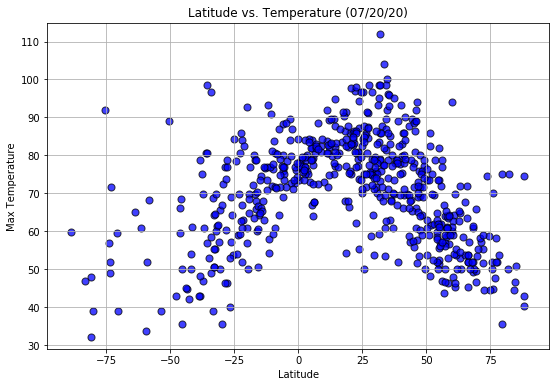

In [21]:
#Build a Scatter plot for each data type
from datetime import date
today = date.today().strftime('%m/%d/%y')

plt.figure(figsize=(9,6))
plt.scatter(clear_city_data["Latitude"],clear_city_data['Max_Temp'], marker='o',facecolors="blue",edgecolors="black", s=50, alpha=0.75)
plt.title(f"Latitude vs. Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.grid(True)


#Modify ticks
plt.xlim(-98, 98)
plt.ylim(min(clear_city_data['Max_Temp'])-3, max(clear_city_data['Max_Temp'])+3)

#save the figure
plt.savefig("../output_data/fig1.png")
plt.show()        

## Latitude vs. Humidity Plot

In [22]:
clear_city_data.head()

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ancud,-41.765817,-77.000587,54.00,76.0,81.0,6.93,CL,1.595277e+09
1,port macquarie,-33.435178,155.105852,39.00,87.0,14.0,11.30,AU,1.595277e+09
2,vaini,-73.048445,-179.956615,71.60,78.0,20.0,6.93,TO,1.595277e+09
3,lebu,-34.968665,-97.058821,52.84,84.0,92.0,9.89,CL,1.595277e+09
5,provideniya,51.494695,-176.254976,48.20,81.0,90.0,6.71,RU,1.595277e+09


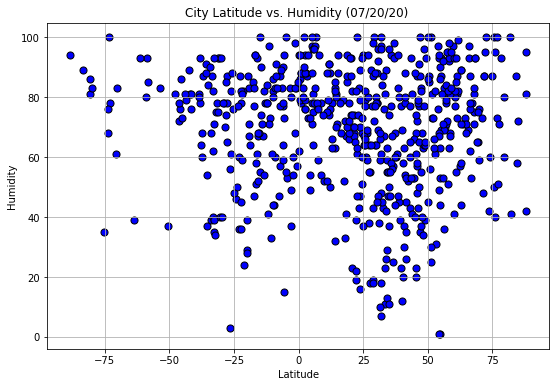

In [24]:
x_axis=clear_city_data['Latitude']
y_axis=clear_city_data['Humidity']
plt.figure(figsize=(9,6))
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue",edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity ({today}) ")
plt.grid(True)
#save the figure
plt.savefig("../output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

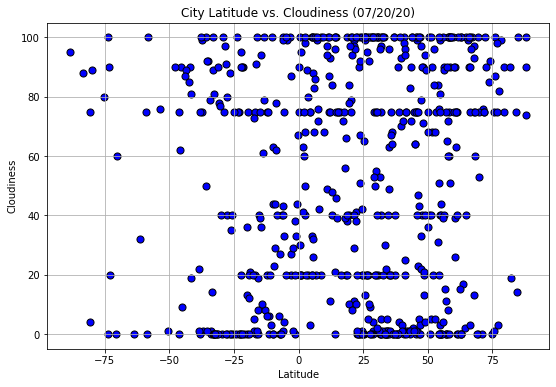

In [26]:
x_axis=clear_city_data['Latitude']
y_axis=clear_city_data['Cloudiness']
plt.figure(figsize=(9,6))
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue",edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({today})")

plt.grid(True)
#save the figure
plt.savefig("../output_data/fig3.png")
plt.show()


## Latitude vs. Wind Speed Plot

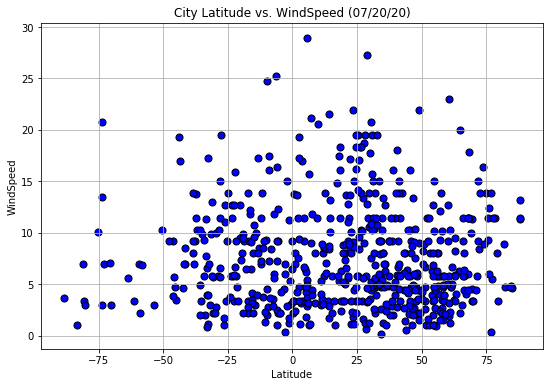

In [28]:
x_axis=clear_city_data['Latitude']
y_axis=clear_city_data['WindSpeed']
plt.figure(figsize=(9,6))
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue",edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.title(f"City Latitude vs. WindSpeed ({today})")

plt.grid(True)
#save the figure
plt.savefig("../output_data/fig4.png")
plt.show()

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [65]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere=clear_city_data.loc[clear_city_data['Latitude']>=0]
Northern_hemisphere

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
5,provideniya,51.494695,-176.254976,48.20,81.0,90.0,6.71,RU,1.595277e+09
7,yumen,40.620691,96.484799,75.31,30.0,100.0,18.03,CN,1.595277e+09
8,saint anthony,54.795253,-55.973825,82.00,44.0,40.0,4.70,US,1.595277e+09
13,ayagoz,47.525591,78.666683,69.33,55.0,97.0,7.52,KZ,1.595277e+09
14,veraval,17.192253,68.883254,83.46,79.0,72.0,14.85,IN,1.595277e+09
...,...,...,...,...,...,...,...,...,...
637,muskogee,35.305961,-95.028238,93.00,55.0,20.0,6.93,US,1.595278e+09
639,dubai,24.547834,55.661430,96.80,60.0,42.0,4.70,AE,1.595278e+09
642,bol,7.567010,15.816505,81.55,76.0,76.0,11.83,TD,1.595278e+09
643,lasa,34.219206,88.283471,62.60,63.0,5.0,0.18,IT,1.595278e+09


The r-squared is : 0.39957842729923543 


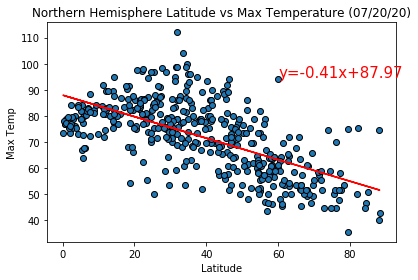

In [66]:
from datetime import date
today = date.today().strftime('%m/%d/%y')

y_values=Northern_hemisphere["Max_Temp"]
x_values=Northern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Northern Hemisphere Latitude vs Max Temperature ({today})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(60,95),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-squared is : {rvalue**2} ")
#save the figure
plt.savefig("../output_data/fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [67]:
Southern_hemispehere=clear_city_data.loc[clear_city_data['Latitude']<0]
Southern_hemispehere

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ancud,-41.765817,-77.000587,54.00,76.0,81.0,6.93,CL,1.595277e+09
1,port macquarie,-33.435178,155.105852,39.00,87.0,14.0,11.30,AU,1.595277e+09
2,vaini,-73.048445,-179.956615,71.60,78.0,20.0,6.93,TO,1.595277e+09
3,lebu,-34.968665,-97.058821,52.84,84.0,92.0,9.89,CL,1.595277e+09
6,bredasdorp,-36.985425,19.626210,60.80,87.0,1.0,10.29,ZA,1.595277e+09
...,...,...,...,...,...,...,...,...,...
624,salinas,-2.178432,-83.785418,71.01,60.0,1.0,14.99,US,1.595278e+09
629,poum,-16.193723,159.677706,70.34,61.0,1.0,9.06,NC,1.595278e+09
634,port keats,-13.365300,126.063871,62.96,54.0,79.0,8.01,AU,1.595278e+09
638,gamba,-8.587277,1.691331,71.38,87.0,62.0,3.65,GA,1.595278e+09


The r-squared is : 0.26513622543432935 


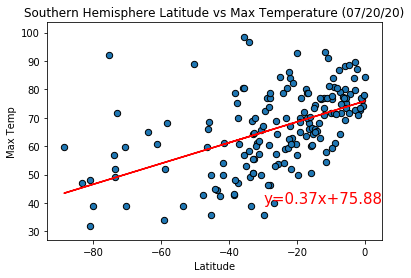

In [68]:
y_values=Southern_hemispehere["Max_Temp"]
x_values=Southern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o",edgecolors="black", s=40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Southern Hemisphere Latitude vs Max Temperature ({today})")
plt.xlim(min(Southern_hemispehere["Latitude"])-5,max(Southern_hemispehere["Latitude"])+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-30,40),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")

plt.savefig("../output_data/fig6.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.00033123356892028583 


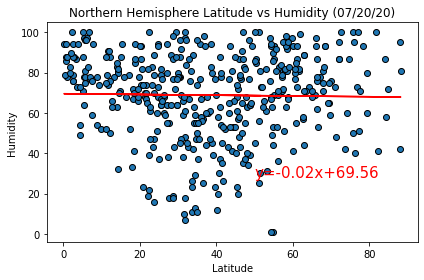

In [69]:
y_values=Northern_hemisphere["Humidity"]
x_values=Northern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Northern Hemisphere Latitude vs Humidity ({today})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,28),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-squared is : {rvalue**2} ")

plt.savefig("../output_data/fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.015860075991458077 


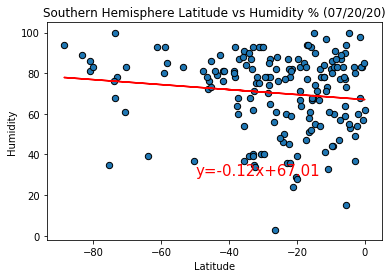

In [71]:
y_values=Southern_hemispehere["Humidity"]
x_values=Southern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o",edgecolors="black", s=40)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Southern Hemisphere Latitude vs Humidity % ({today})")
plt.xlim(min(Southern_hemispehere["Latitude"])-5,max(Southern_hemispehere["Latitude"])+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-50,30),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")

plt.savefig("../output_data/fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.00018246099971481458 


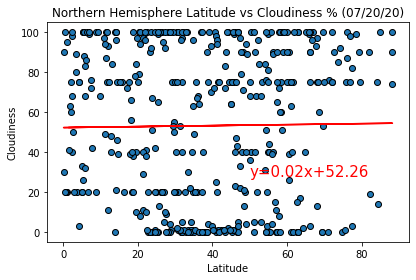

In [72]:
y_values=Northern_hemisphere["Cloudiness"]
x_values=Northern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere Latitude vs Cloudiness % ({today})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,28),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-squared is : {rvalue**2} ")

plt.savefig("../output_data/fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.020706996905745814 


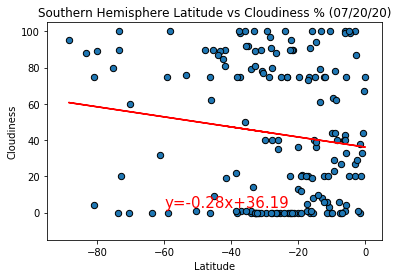

In [73]:
y_values=Southern_hemispehere["Cloudiness"]
x_values=Southern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o",edgecolors="black", s=40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-95,5)
plt.title(f"Southern Hemisphere Latitude vs Cloudiness % ({today})")
plt.ylim(min(y_values)-15,max(y_values)+5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-60,3),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")

plt.savefig("../output_data/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.008220614565696966 


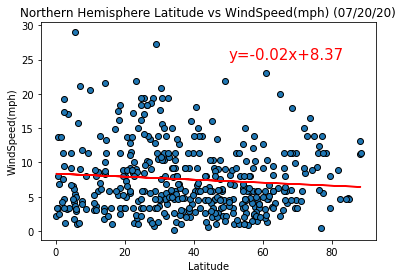

In [76]:
y_values=Northern_hemisphere["WindSpeed"]
x_values=Northern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.title(f"Northern Hemisphere Latitude vs WindSpeed(mph) ({today})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,25),fontsize=15,color="red")

print(f"The r-squared is : {rvalue**2} ")
plt.savefig("../output_data/fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.0008774830249432507 


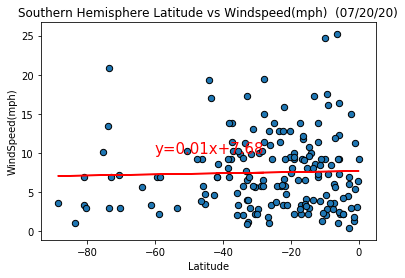

In [77]:
y_values=Southern_hemispehere["WindSpeed"]
x_values=Southern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o",edgecolors="black", s=40)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.title(f"Southern Hemisphere Latitude vs Windspeed(mph)  ({today})")
plt.xlim(min(Southern_hemispehere["Latitude"])-5,max(Southern_hemispehere["Latitude"])+5)
plt.ylim(min(y_values)-1.5,max(y_values)+1.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-60,10),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")
plt.savefig("../output_data/fig12.png")
plt.show()

In [78]:
#Analysis:
# 1)In Southern and Northen Hemisphere, WindSpeed doesn't depend on Latitude. 
# While latitudes are changing though the WindSpeed is almost constant
# 2)In Northern Hemisphere, Max temperature has inverse relation with Latitudes. 
# While Latitudes are increasing, Max Temperature is decreasing.
# On the other hand, in Southern Hemipshere, there is direct realtion between Max temperature and Latitudes. 
# While latitudes are increasing, temperature is increasing as well
# 3) In Northern Hemisphere, there is inverse relation between Latitude and Humidity. While latitudes are increasing, the humidity is decreasing.
# But this inverse rate is smaller than the inverse rate in Southern Hemisphere. There is also inverse relation between latitudes and humidity.
# While latitudes are increasing, the humidity is decreasing
# 4) from the Latitude Humidity Graph, we can understand that when you go to the equator, the humidity is increasing.